# K Mean Clustering

Objective: Customer clustering  
Dataset: customer.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('customers.csv')
print(data.shape)
data.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
data.columns = ['ID','Gender','Age','Income','Score']
data.head()

,ID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

Female    112
Male       88
Name: Gender, dtype: int64


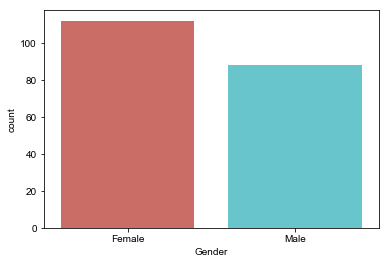

In [3]:
print(data['Gender'].value_counts())

sns.countplot(x='Gender',data = data, palette='hls',order = data['Gender'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Check Null

In [4]:
data.isnull().sum()

ID        0
Gender    0
Age       0
Income    0
Score     0
dtype: int64

## Convert Categorical to Numerical

In [5]:
data["Gender"] = data["Gender"].astype('category')
data["Gender#"] = data["Gender"].cat.codes 
data.head()

,ID,Gender,Age,Income,Score,Gender#
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


## Drop Column

In [6]:
data.drop(['ID','Gender'],axis=1,inplace=True)
data.head()

,Age,Income,Score,Gender#
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## Correlation

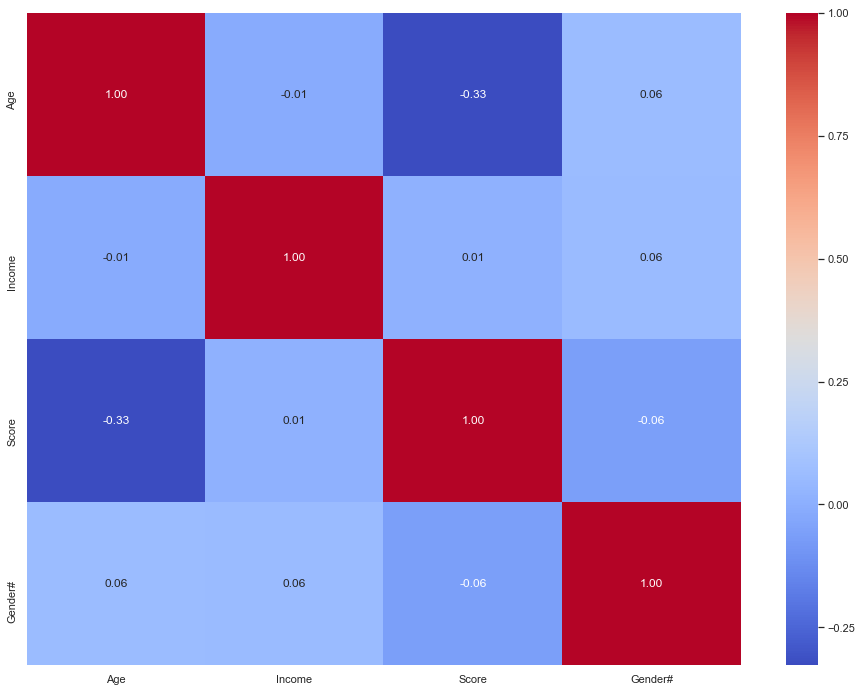

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

## Data Standardization

In [8]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(data)
X = mms.transform(data)
print('Dataset', X.shape)
X[0:2]

Dataset (200, 4)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ]])

## Find the Best K

In [9]:
from sklearn import metrics

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

[86.68148216035942, 37.27227241211876, 29.552857611943857, 22.39096001192855, 19.081722486105587, 16.415387154119944, 14.204916470576652, 12.239159422864393, 10.606198613220782, 9.392393333765714, 8.477007977522108, 7.720564416031772, 7.1281128379500105, 6.559807380820775]


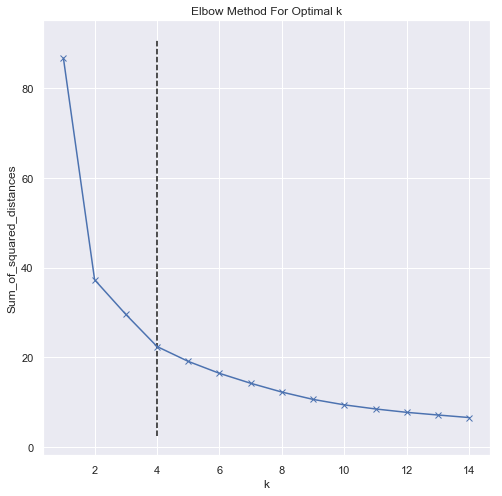

The best k: 4


In [10]:
y = Sum_of_squared_distances
x = range(1, len(y)+1)

from kneed import KneeLocator
kn = KneeLocator(x, y, curve='convex', direction='decreasing')

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

print('The best k:', kn.knee)

## K Mean Clustering Modelling

In [11]:
clusterNum = kn.knee
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print('No. of cluster', labels.shape)
labels[0:10]

No. of cluster (200,)


array([2, 2, 0, 3, 3, 3, 0, 3, 1, 3])

## Assign Labels Cluster to Dataframe

In [12]:
data["KM_Cluster"] = labels
data.head(5)

,Age,Income,Score,Gender#,KM_Cluster
0,19,15,39,1,2
1,21,15,81,1,2
2,20,16,6,0,0
3,23,16,77,0,3
4,31,17,40,0,3


## Cluster 2D Visualization

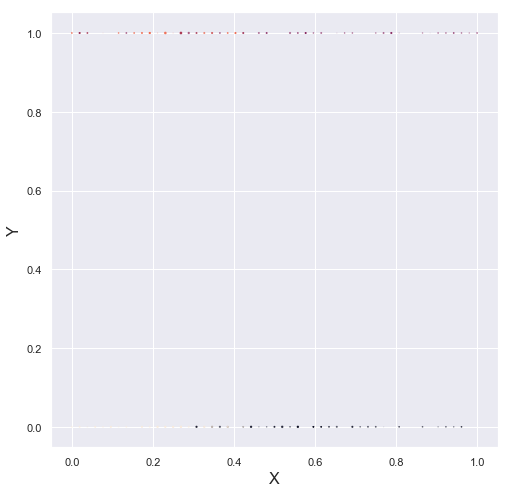

In [13]:
data.groupby('KM_Cluster').mean()

area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('X', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.show()

## Cluster 3D Visualization

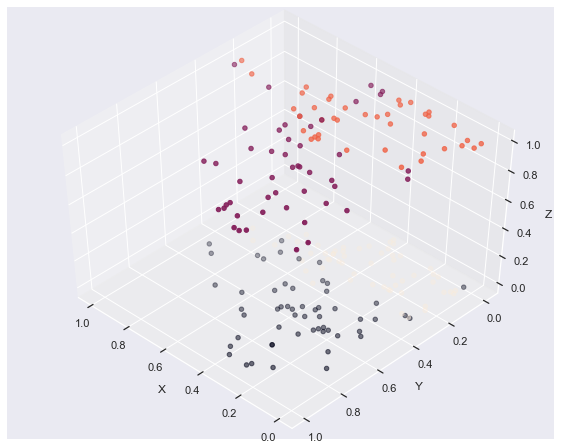

In [14]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

## List and View Cluster

3    57
0    55
1    48
2    40
Name: KM_Cluster, dtype: int64


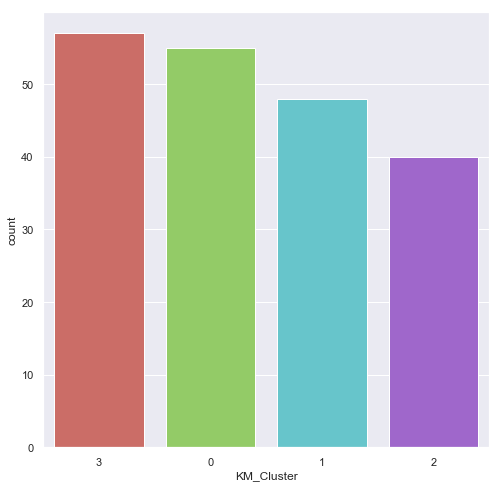

In [15]:
print(data['KM_Cluster'].value_counts())

sns.countplot(x='KM_Cluster',data = data, palette='hls',order = data['KM_Cluster'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

In [16]:
data[data['KM_Cluster']== 0].head(10)

,Age,Income,Score,Gender#,KM_Cluster
2,20,16,6,0,0
6,35,18,6,0,0
12,58,20,15,0,0
16,35,21,35,0,0
22,46,25,5,0,0
24,54,28,14,0,0
26,45,28,32,0,0
28,40,29,31,0,0
34,49,33,14,0,0
36,42,34,17,0,0


In [17]:
data[data['KM_Cluster']== 1].head(10)

,Age,Income,Score,Gender#,KM_Cluster
8,64,19,3,1,1
10,67,19,14,1,1
14,37,20,13,1,1
18,52,23,29,1,1
20,35,24,35,1,1
30,60,30,4,1,1
32,53,33,4,1,1
42,48,39,36,1,1
53,59,43,60,1,1
55,47,43,41,1,1
